# Lab 04. Text Classification


This lab is devoted to text classification tasks.
- **Part 1 [8 points]** is about very common NLP problem - sentiment analysis.
- **Part 2 [7 points]** include tasks on POS tagging and WordEmbeddings.


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit

- Name your file according to this convention: `lab04_GroupNo_Surname_Name.ipynb`. If you don't have group number, put `nan` instead.
- Attach it to an **email** with **topic** `lab04_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-11-24 23:00:00 +03:00`

## Part 1. Bag of Words vs. Bag of Popcorn [8 points]

This task is based on [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. The goal is to label film reviews as positive or negative. 

Reviews may look like this:

```
I dont know why people think this is such a bad movie. Its got a pretty good plot, some good action, and the change of location for Harry does not hurt either. Sure some of its offensive and gratuitous but this is not the only movie like that. Eastwood is in good form as Dirty Harry, and I liked Pat Hingle in this movie as the small town cop. If you liked DIRTY HARRY, then you should see this one, its a lot better than THE DEAD POOL. 4/5
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
reviews = pd.read_csv("reviews.tsv", sep="\t")
reviews.head(3)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...


In [3]:
X = reviews["review"]
y = reviews["sentiment"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=42, stratify=y)

### Time to extract features

In this part of the assignment we will apply several methods of feature extraction and comapre them.

**Task 1.1 [0.5 point] - Simple BOW** 

In this task we will build a simple bow representation - without any preprocessing. 

For this purpose we will use [*CountVectorizer*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) - a method that transforms text dataset into a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html).

Import CountVectorizer:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

Now try each of these approaches:
- fit vectorizer on X_train, apply to X_train, X_test
- fit vectorizer on X_train, apply to X_train; fit on X_test, apply to X_test
- fit vectorizer on X, apply to X_train, X_test

Report output matrix sizes in each case. 
- What is the difference? 
- Which of these approaches is the most fair and correct?

Use the most fair and correct one to get `X_train_0` and `X_test_0` - they will be needed for further tasks.

In [7]:
count_vectorizer = CountVectorizer()

# MY CODE BELOW
count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 74849) (5000, 74849)


In [8]:
type(X_train_0)

scipy.sparse.csr.csr_matrix

In [9]:
count_vectorizer = CountVectorizer()

# MY CODE BELOW
count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_test)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 38591)


In [10]:
type(X_train_0)

scipy.sparse.csr.csr_matrix

In [11]:
count_vectorizer = CountVectorizer()

# MY CODE BELOW
count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 68482)


In [12]:
type(X_train_0)

scipy.sparse.csr.csr_matrix

***Answer***: Although it is better to use more examples in NLP, we can only use the first one(fit vectorizer on X_train, apply to X_train, X_test) because we still want to test our model.

**Task 1.2 [0.5 point] - S___se matrices**

What is the data type of `X_train_0` and `X_test_0`? What are those?

What differs them from usual np.arrays? Name several types how those special matrices are stored and what they are good for.

***Answer:*** Those are sparce matrices, representations of reviews as tokens which essentially are some meaningful units. More specifically those are compressed sparce row(CSR) matrices which contain information only about non-zero values in rows. Other types can be compressed sparce column(CSC) matrices which is mathematically equivalent to CSR and coordinate list which contains all non-zero values and their indexes. CSR and CSC are more compressed versions of coordinate list so they are better memory-wise.

**Task 1.3 [1 points] - Training**

Train LogisticRegression and Random forest on this data representations.
- Compare training time 
- Compare Accuracy, precision, recall 
- Plot ROC Curve and calculate ROC AUC (don't forget to predict_proba) 
- Plot Precision-Recall curve and calculate f1-score (for example, with `plt.subplots(nrows=1, ncols=2)`)
- Print the trickiest missclassified objects. Why they were hard to classify? 


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time as tm

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [15]:
rf_model = RandomForestClassifier(n_estimators=500)
lr_model = LogisticRegression(max_iter=1e5)

In [16]:
rf_start = tm.time()
rf_model.fit(X_train_0, y_train)
rf_end = tm.time()
rf_preds = rf_model.predict(X_test_0)
rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
print('========RANDOM FOREST MODEL========')
print('Fit time:', rf_end - rf_start)
print('Accuracy score:', rf_acc)
print('Precision score:', rf_prec)
print('Recall score:', rf_rec)
print('===================================')
lr_start = tm.time()
lr_model.fit(X_train_0, y_train)
lr_end = tm.time()
lr_preds = lr_model.predict(X_test_0)
lr_acc = accuracy_score(y_test, lr_preds)
lr_prec = precision_score(y_test, lr_preds)
lr_rec = recall_score(y_test, lr_preds)
print('=====LOGISTIC REGRESSION MODEL=====')
print('Fit time:', lr_end - lr_start)
print('Accuracy score:', lr_acc)
print('Precision score:', lr_prec)
print('Recall score:', lr_rec)
print('===================================')

========RANDOM FOREST MODEL========
Fit time: 336.14110803604126
Accuracy score: 0.8598
Precision score: 0.8485083301046106
Recall score: 0.876
=====LOGISTIC REGRESSION MODEL=====
Fit time: 26.20793914794922
Accuracy score: 0.8818
Precision score: 0.8756395120031484
Recall score: 0.89


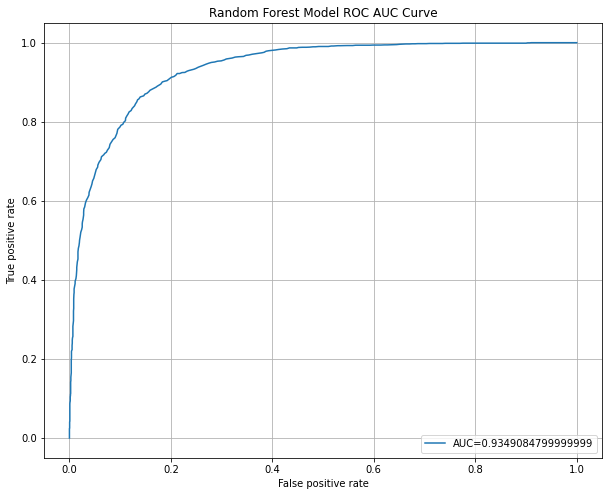

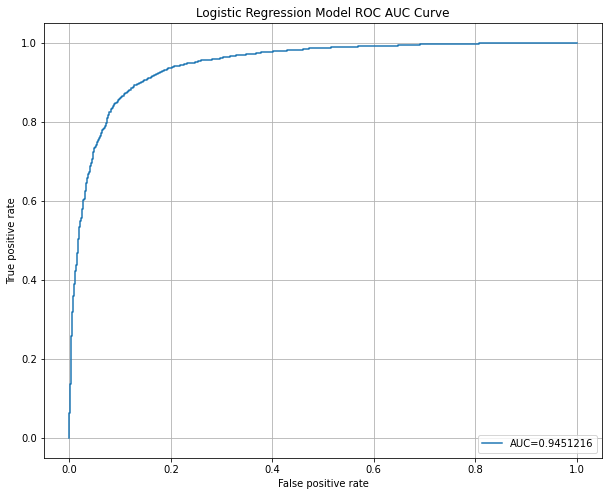

In [17]:
# Plot ROC Curve and calculate ROC AUC (don’t forget to predict_proba)
rf_pred_proba = rf_model.predict_proba(X_test_0)[::,1]
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
auc = roc_auc_score(y_test, rf_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Model ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

lr_pred_proba = lr_model.predict_proba(X_test_0)[::,1]
fpr2, tpr2, _ = roc_curve(y_test, lr_pred_proba)
auc2 = roc_auc_score(y_test, lr_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr2, tpr2, label='AUC='+str(auc2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression Model ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

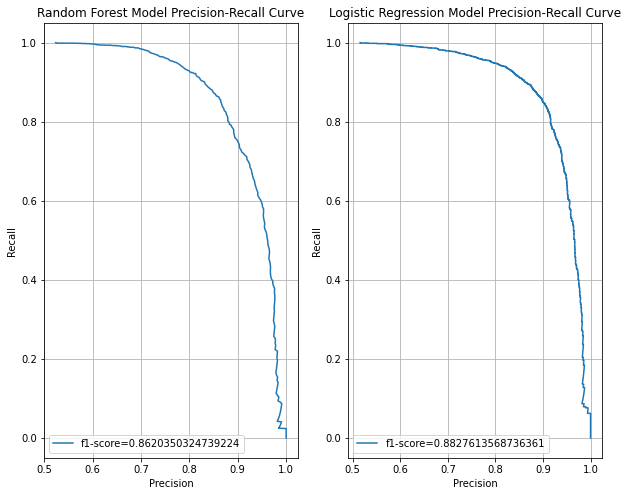

In [18]:
# Plot Precision-Recall curve and calculate f1-score (for example, with plt.subplots(nrows=1, ncols=2))
rf_pre_curve, rf_rec_curve, _ = precision_recall_curve(y_test, rf_pred_proba)
lr_pre_curve, lr_rec_curve, _ = precision_recall_curve(y_test, lr_pred_proba)
rf_f1 = f1_score(y_test, rf_preds)
lr_f1 = f1_score(y_test, lr_preds)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
axes[0].plot(rf_pre_curve, rf_rec_curve, label='f1-score='+str(rf_f1))
axes[0].set_xlabel('Precision')
axes[0].set_ylabel('Recall')
axes[0].set_title('Random Forest Model Precision-Recall Curve')
axes[0].legend(loc='lower left')
axes[0].grid()
axes[1].plot(lr_pre_curve, lr_rec_curve, label='f1-score='+str(lr_f1))
axes[1].set_xlabel('Precision')
axes[1].set_ylabel('Recall')
axes[1].set_title('Logistic Regression Model Precision-Recall Curve')
axes[1].legend(loc='lower left')
axes[1].grid()
plt.show()

Which model gives higher scores? Any ideas why? Please suggest 1-2 reasons.

***Answer:*** Logistic Regression model gives better results because massive amount of features in BOW confuses Random Forest model.

### More sophisticated feature preprocessing

As we have seen, simple BOW can give us some result - it's time to improve it.

**Task 1.4 [1 point] - Frequencies calculation**

- Calculate top-20 words in train set and test set. *Are they meaningful?*
- Import `stopwords` and print some of them. What are those?
- Recalculate top-20 words in each set, but exclude stop words.
- Does now top-20 include more useful words?

In [19]:
from collections import Counter
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

In [20]:
tokenizer = WhitespaceTokenizer()
train_count = Counter()
test_count = Counter()

for review in X_train:
    train_count += Counter(tokenizer.tokenize(review.lower().replace('<br /><br />', ' ')))

for review in X_test:
    test_count += Counter(tokenizer.tokenize(review.lower().replace('<br /><br />', ' ')))

print('Top 20 words in train set:', train_count.most_common(n=20))
print('Top 20 words in test set:', test_count.most_common(n=20))

Top 20 words in train set: [('the', 264301), ('a', 128675), ('and', 127884), ('of', 115962), ('to', 107541), ('is', 83655), ('in', 73118), ('i', 59517), ('this', 57844), ('that', 53379), ('it', 53332), ('was', 37720), ('as', 36562), ('for', 34555), ('with', 34516), ('but', 32386), ('on', 25669), ('movie', 24954), ('his', 23376), ('are', 23034)]
Top 20 words in test set: [('the', 65331), ('a', 32014), ('and', 31432), ('of', 28698), ('to', 26694), ('is', 20595), ('in', 18389), ('i', 14705), ('this', 14138), ('it', 13143), ('that', 13099), ('was', 9335), ('as', 9248), ('for', 8601), ('with', 8387), ('but', 8155), ('on', 6144), ('movie', 5955), ('not', 5790), ('his', 5741)]


In [21]:
print('Top 20 words in train set:', [x[0] for x in train_count.most_common(n=20)])
print('Top 20 words in test set:', [x[0] for x in test_count.most_common(n=20)])

Top 20 words in train set: ['the', 'a', 'and', 'of', 'to', 'is', 'in', 'i', 'this', 'that', 'it', 'was', 'as', 'for', 'with', 'but', 'on', 'movie', 'his', 'are']
Top 20 words in test set: ['the', 'a', 'and', 'of', 'to', 'is', 'in', 'i', 'this', 'it', 'that', 'was', 'as', 'for', 'with', 'but', 'on', 'movie', 'not', 'his']


***Answer:*** They include articles and such things so they are not very useful.

In [22]:
nltk.download('stopwords')
stopwords_eng = stopwords.words('english')
print(stopwords_eng[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***Answer:***
[Source](https://en.wikipedia.org/wiki/Stop_word)
>Stop words are the words in a stop list (or stoplist or negative dictionary) which are filtered out (i.e. stopped) before or after processing of natural language data (text) because they are insignificant.

In [23]:
for word in stopwords_eng:
    del train_count[word]
    del test_count[word]

In [24]:
print('Top 20 words in train set:', [x[0] for x in train_count.most_common(n=20)])
print('Top 20 words in test set:', [x[0] for x in test_count.most_common(n=20)])

Top 20 words in train set: ['movie', 'film', 'one', 'like', 'even', 'would', 'good', 'really', 'see', '-', 'get', 'much', 'story', 'also', 'first', 'time', 'people', 'great', 'make', 'could']
Top 20 words in test set: ['movie', 'film', 'one', 'like', 'good', 'would', 'even', 'really', 'see', '-', 'get', 'story', 'much', 'first', 'also', 'great', 'time', 'could', 'make', 'people']


***Answer:*** Now these words are meaningful because they represent the sentiment of a review.

**Task 1.5 [1 point] - Word Freqs by class**

How do you think, will top100 tokens for positive and negative classes be different? Use data to prove your point.

***Answer:*** They are almost identical. See the code below.

In [25]:
positive_count = Counter()
negative_count = Counter()

for i in range(len(X)):
    tmp = Counter(tokenizer.tokenize(X[i].lower().replace('<br /><br />', ' ')))
    if y[i]:
        positive_count += tmp
    else:
        negative_count += tmp

In [26]:
list1 = [x[0] for x in train_count.most_common(n=100)]
list2 = [x[0] for x in test_count.most_common(n=100)]

tmp_count = 0
for word in list1:
    if word in list2:
        tmp_count += 1
print('Positive/negative tops 100 reviews most frequent words differ by ', len(list1) - tmp_count)

Positive/negative tops 100 reviews most frequent words differ by  3


**Task 1.6 [2 points] - Reducing dimensionality**

The goal is to reduce number of features to 15000.

Implement the following methods of dimensinality reduction:
1. Use CountVectorizer, but leave only 15k most frequent tokens
2. Use HashingVectorizer with 15k features
3. Use 15k most important features from perspective of previously trained RandomForest

*Hints:*
- in 1 and 2 you don't have to apply nltk.corpus.stopwords, vectorizers have `stopwords` parameter
- in 1 look for `vocabulary` parameter
- in 3... remember `lab02`? You may use `X_train_0` and `X_test_0` as input matrices

Train LogisticRegression and RandomForest on each dataset and compare ROC AUC scores of the classifiers.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [28]:
clf = CountVectorizer(stop_words=stopwords_eng,
                      vocabulary=[x[0] for x in train_count.most_common(15000)])
clf.fit(X_train)
X_train_tra = clf.transform(X_train)
X_test_tra = clf.transform(X_test)

clf2 = HashingVectorizer(stop_words=stopwords_eng, n_features=15000)
clf2.fit(X_train)
X_train_tra2 = clf2.transform(X_train)
X_test_tra2 = clf2.transform(X_test)

In [29]:
tmp_dict = {}
tmp_val = rf_model.feature_importances_
for index in range(len(tmp_val)):
    tmp_dict[index]=tmp_val[index]
important_feature_idx = [x for x,_ in sorted(tmp_dict.items(), key=lambda f: f[1], reverse=True)][:15000]
del tmp_dict

print(important_feature_idx)

[5011, 67453, 26188, 4799, 66106, 2969, 21010, 41930, 67437, 7760, 60773, 6422, 67259, 42175, 60594, 31746, 58478, 40422, 42730, 60975, 36255, 46545, 46180, 30278, 61493, 32837, 29044, 1463, 66075, 20830, 31830, 4065, 17938, 65127, 66411, 39356, 45077, 60756, 14073, 42152, 42987, 43157, 2689, 28520, 60858, 60897, 27618, 53404, 59132, 7961, 9029, 2561, 22507, 46548, 67120, 68015, 39905, 51108, 5867, 4744, 23358, 5769, 13810, 29820, 56201, 34441, 3368, 42949, 36261, 35513, 66776, 66108, 42964, 7828, 4330, 3752, 35445, 22015, 28355, 38810, 66720, 27708, 2422, 66891, 58100, 3196, 67466, 58990, 31100, 37043, 17718, 61518, 25747, 9100, 6468, 18691, 8318, 2885, 27509, 24027, 60936, 66544, 53654, 1143, 56422, 67877, 43438, 40144, 66453, 5964, 67405, 9461, 40862, 26927, 42805, 57919, 16771, 21798, 2631, 34942, 42733, 49310, 10764, 3382, 46330, 60820, 45095, 5042, 66587, 24167, 68024, 28106, 64384, 20104, 61309, 21737, 63751, 40289, 44595, 27792, 40504, 49347, 38294, 45008, 54427, 61660, 63941, 

In [33]:
from scipy.sparse import csr_matrix, SparseEfficiencyWarning
import warnings

warnings.simplefilter('ignore', SparseEfficiencyWarning)

from scipy.sparse import csr_matrix
def replacerow(matrix, row_index, new_row):
    matrix.data[matrix.indptr[row_index]:matrix.indptr[row_index+1]] = 0.0
    indices = np.nonzero(new_row)
    matrix[row_index, indices] = new_row[indices]

X_train_copy = csr_matrix((20000, 15000), dtype=np.int64)
X_test_copy = csr_matrix((5000, 15000), dtype=np.int64)

for i in range(X_train_copy.shape[0]):
    row = pd.DataFrame(X_train_0[i].toarray())[important_feature_idx].to_numpy()
    replacerow(X_train_copy, i, row)

for i in range(X_test_copy.shape[0]):
    row = pd.DataFrame(X_test_0[i].toarray())[important_feature_idx].to_numpy()
    replacerow(X_test_copy, i, row) 

[source for previous code cell](https://notebook.community/andim/pysnippets/sparse-matrix-updating-benchmarking)

In [34]:
rf_clf1 = RandomForestClassifier(n_estimators=500)
rf_clf2 = RandomForestClassifier(n_estimators=500)
rf_clf3 = RandomForestClassifier(n_estimators=500)
lr_clf1 = LogisticRegression(max_iter=1e5)
lr_clf2 = LogisticRegression(max_iter=1e5)
lr_clf3 = LogisticRegression(max_iter=1e5)

In [35]:
rf_clf1.fit(X_train_tra, y_train)
rf_clf1_pred_proba = rf_clf1.predict_proba(X_test_tra)[::,1]
rf_clf1_auc = roc_auc_score(y_test, rf_clf1_pred_proba)

In [36]:
rf_clf2.fit(X_train_tra2, y_train)
rf_clf2_pred_proba = rf_clf2.predict_proba(X_test_tra2)[::,1]
rf_clf2_auc = roc_auc_score(y_test, rf_clf2_pred_proba)

In [37]:
rf_clf3.fit(X_train_copy, y_train)
rf_clf3_pred_proba = rf_clf3.predict_proba(X_test_copy)[::,1]
rf_clf3_auc = roc_auc_score(y_test, rf_clf3_pred_proba)

In [38]:
lr_clf1.fit(X_train_tra, y_train)
lr_clf1_pred_proba = lr_clf1.predict_proba(X_test_tra)[::,1]
lr_clf1_auc = roc_auc_score(y_test, lr_clf1_pred_proba)

In [39]:
lr_clf2.fit(X_train_tra2, y_train)
lr_clf2_pred_proba = lr_clf2.predict_proba(X_test_tra2)[::,1]
lr_clf2_auc = roc_auc_score(y_test, lr_clf2_pred_proba)

In [40]:
lr_clf3.fit(X_train_copy, y_train)
lr_clf3_pred_proba = lr_clf3.predict_proba(X_test_copy)[::,1]
lr_clf3_auc = roc_auc_score(y_test, lr_clf3_pred_proba)

In [41]:
print("RF 1:", rf_clf1_auc)
print("RF 2:", rf_clf2_auc)
print("RF 3:", rf_clf3_auc)

print("LR 1:", lr_clf1_auc)
print("LR 2:", lr_clf2_auc)
print("LR 3:", lr_clf3_auc)

RF 1: 0.93494896
RF 2: 0.93142176
RF 3: 0.93140776
LR 1: 0.93517184
LR 2: 0.94515824
LR 3: 0.94032416


The best estimator is LogReg + HashVectorizer + 15.000 features: 0.94515824

**Task 1.7 [2 points] - Token Normalization**

Choose the best working method from previous task. Try improve it by applying a token normalization technique.

You may use one of normalizers imported below, but feel free to experiment.

Do the following:
- Apply normalizer to X_train, X_test
- Build BOW with CountVectorizer + stopwords. What are the shapes of train and test matrices now?
- Reduce dimensionality with the best method from Task 2.6. You may try all of them
- Train LR/RF to examine whether ROC AUC or Accuracy was improved.

In [42]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
lemmatizer = WordNetLemmatizer()
X_train_mod = pd.Series()
X_test_mod = pd.Series()

for text in X_train:
    tokens = nltk.word_tokenize(text.lower().replace('<br /><br />', ' '))
    X_train_mod = pd.concat([X_train_mod, pd.Series(' '.join([lemmatizer.lemmatize(w) for w in tokens]))])

for text in X_test:
    tokens = nltk.word_tokenize(text.lower().replace('<br /><br />', ' '))
    X_test_mod = pd.concat([X_test_mod, pd.Series(' '.join([lemmatizer.lemmatize(w) for w in tokens]))])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
clf_mod = CountVectorizer(stop_words=stopwords.words('english'))
clf_mod.fit(X_train_mod)
X_train_mod_0 = clf_mod.transform(X_train_mod)
X_test_mod_0 = clf_mod.transform(X_test_mod)

print(X_train_mod_0.shape, X_test_mod_0.shape)

(20000, 63053) (5000, 63053)


Due to the code above the amount of features in new matrices is: 63053

In [45]:
clf_mod_1 = HashingVectorizer(stop_words=stopwords.words('english'),
                            n_features=15_000)
clf_mod_1.fit(X_train_mod)
X_train_mod_1 = clf_mod_1.transform(X_train_mod)
X_test_mod_1 = clf_mod_1.transform(X_test_mod)

In [46]:
rf_m = RandomForestClassifier(n_estimators=500)
lr_m = LogisticRegression(max_iter=1e5)

rf_m.fit(X_train_mod_1, y_train)
rf_m_proba = rf_m.predict_proba(X_test_mod_1)[::,1]
rf_m_rocauc = roc_auc_score(y_true=y_test, y_score=rf_m_proba)

lr_m.fit(X_train_mod_1, y_train)
lr_m_proba = lr_m.predict_proba(X_test_mod_1)[::,1]
lr_m_rocauc = roc_auc_score(y_true=y_test, y_score=lr_m_proba)

print("RF:", rf_m_rocauc)
print("LR:", lr_m_rocauc)

RF: 0.9329682399999999
LR: 0.94443712


The result was decreased by 0.94515824 - 0.94443712 = 0.00072112

## Part 2. Word Embeddings [7 points]

In [47]:
import gensim.downloader

Here is the list of pretrained word embedding models. We suggest using `glove-wiki-gigaword-100`.

In [48]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [49]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


**Task 2.1 [1 point] - WordEmbeddings Geometry**

As you probably know, vector space of word embeddings has non-trivial geometry: some word relations (like country-capital or single-plural) cab be represented by vectors, like: **(king - man) + woman = queen**

<img src="https://linkme.ufanet.ru/images/5687a2011b49eb2413912f1c7d0fb0bd.png" width=600px>

Check this statement on words from the above picture with `word_embeddings.most_similar` function. Pay attention to `positive` and `negative` params.

Provide **several** examples, make sure to present different relations: some for nouns, some for verbs, etc.

In [55]:
print(word_embeddings.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)[0][0], '== queen?')
print(word_embeddings.most_similar(positive=['daughter', 'mother'], negative=['son'], topn=1)[0][0], '== father?')
print(word_embeddings.most_similar(positive=['himself', 'she'], negative=['he'], topn=1)[0][0], '== herself?')
print(word_embeddings.most_similar(positive=['herself', 'it'], negative=['she'], topn=1)[0][0], '== itself?')
print(word_embeddings.most_similar(positive=['longest', 'slow'], negative=['long'], topn=1)[0][0], '== slowest?')
print(word_embeddings.most_similar(positive=['longer', 'slow'], negative=['long'], topn=1)[0][0], '== slower?')

queen == queen?
sister == father?
herself == herself?
itself == itself?
fastest == slowest?
faster == slower?


As we can see not every word is correctly embedded. There is no problems with "he", "she", but much more errors with adverbs.

**Task 2.2 [2 point] - POS analysis**

Use POS tagger to calculate most common POS in the dataset. 
Here you may read about nltk-taggers: [link](https://www.inf.ed.ac.uk/teaching/courses/icl/nltk/tagging.pdf)

- If you were to design POS-related weights, how would you do it? 
- What POS would get the higher weight? 

In [56]:
nltk.download('averaged_perceptron_tagger')
pos_cnt = Counter()
for text in X:
    tokens = nltk.word_tokenize(text.lower().replace('<br /><br />', ' '))
    pos = nltk.pos_tag(tokens)
    for part in pos:
        pos_cnt[part[1]] += 1
pos_cnt.most_common(1)[0][0]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


'NN'

As we can see the most frequent part of speech in dataset is noun.
So, probably, we can just calculate the frequency of each part of speech and calculate weights related to it, like TF-IDF weights. 

**Task 2.3 [4 points] - WordEmbeddings**

Use dense vector representations to construct vector-representation of each review, then train a model (LR or RF).

Compare results of the new model to results of the models above.

**Important**
- If you just sum embeddings of each token to get an embedding of the whole review, the cost of the task is **[2 points]**
- For **[4 points]** you have to use either TF-IDF weight or weights that you designed from POS tags.